# Problem Dataset:
This dataset contains person's information like age,sex,gender,bmi,region,smoke or not and we have to predict their medical insurance cost.In this notebook I will apply regression technique of supervised learning to predict the medical insurance costs.

# Columns

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats import diagnostic as diag
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



In [2]:
data = pd.read_csv(r"C:\Users\ganes\Desktop\Data Science Github\Linear regression\insurance.csv")

In [3]:
data.head() #top 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail() # buttom 5 rows

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])

Rows     :  1338
Columns  :  7


# Missing Value & Data Types & Unique values 

In [6]:
def data_summary(df):
    df_U = df.nunique()
    df_M = df.isnull().sum()
    df_I = df.dtypes
    df_U = df_U.to_frame().reset_index()
    df_M = df_M.to_frame().reset_index()
    df_I = df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output;

In [7]:
data_summary(data)

,index,Missing Data,Unique Data,Data Types
0,age,0,47,int64
1,sex,0,2,object
2,bmi,0,548,float64
3,children,0,6,int64
4,smoker,0,2,object
5,region,0,4,object
6,charges,0,1337,float64


- Since there are no missing values in the dataset.
- As u can see in Age columns has 47 unique age present in the dataset.

# Outlier detection

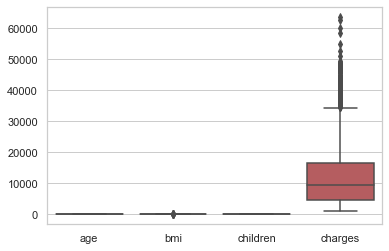

In [8]:
sns.boxplot(data= data)

- As u can see Charger column have more number of outlier in the dataset.
- We have to remove the outlier using the Interqualite range (IQR)


-13109.1508975 34489.350562499996


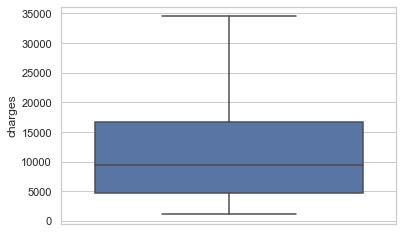

In [9]:
q1=data['charges'].quantile(0.25)
q3=data['charges'].quantile(0.75)
iqr=q3-q1 #Inter Quartile Range
low  = q1-1.5*iqr
high = q3+1.5*iqr
print(low,high)

# np.where statement is used instead of "if-else"
data['charges']=np.where(data['charges'] > high,high,data['charges']) #upper limit

data['charges']=np.where(data['charges'] < low,low,data['charges']) #lower limit

sns.boxplot(y=data["charges"])

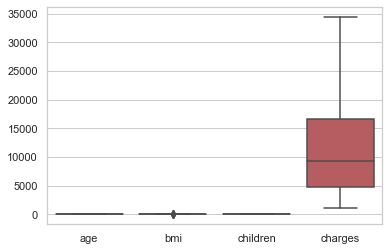

In [10]:
# Lets check to comformed the there are no outliers in the dataset.
sns.boxplot(data=data)

# EDA(Exploratory data analysis)

#### lets Explore the  Dependent variable(Charges)?

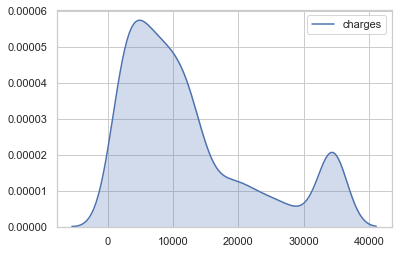

In [11]:
sns.kdeplot(data['charges'],shade=True,color='b')

- By looking at the data distribution we can says it not to bad for making prediction.
- Because its seems like Normal Distribution only
- Most of the Charges are in between 0 - 10000 in the dataset.

In [12]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

Text(0.5, 1.0, 'Count of Male and Female')

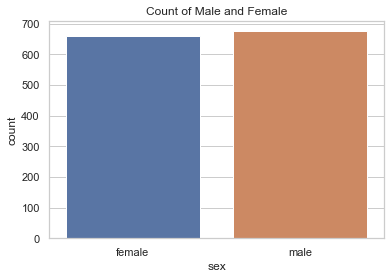

In [13]:
sns.countplot(data['sex'])
plt.title("Count of Male and Female")

- Its seem like difficult to predict because both have same count

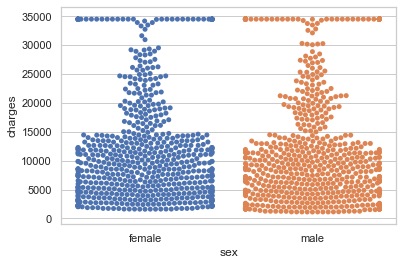

In [14]:
sns.swarmplot(data['sex'], data['charges'])

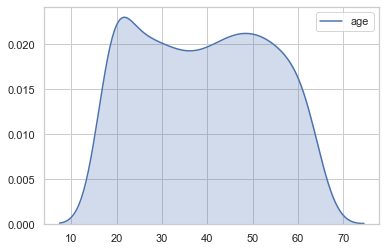

In [15]:
sns.kdeplot(data['age'],shade=True,color='b')

Text(0.5, 1.0, 'Distribution of ages of female')

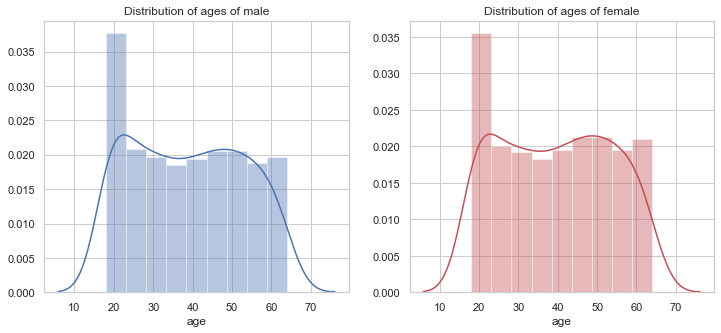

In [16]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.sex == 'male')]["age"],color='b',ax=ax)
ax.set_title('Distribution of ages of male')

ax=f.add_subplot(122)
sns.distplot(data[(data.sex == 'female')]['age'],color='r',ax=ax)
ax.set_title('Distribution of ages of female')

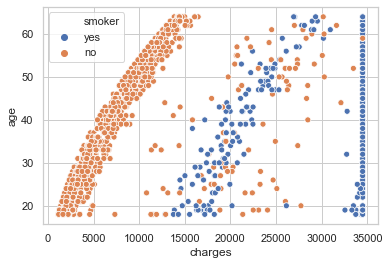

In [17]:
# Charges vs Age by smoker
sns.scatterplot(x = 'charges', y = 'age', data = data, hue = 'smoker')

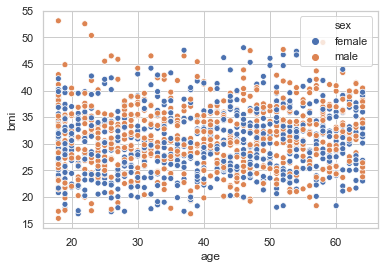

In [18]:
# Age Vs Bmi by age
sns.scatterplot(x="age", y="bmi", hue='sex',data=data,color='red')

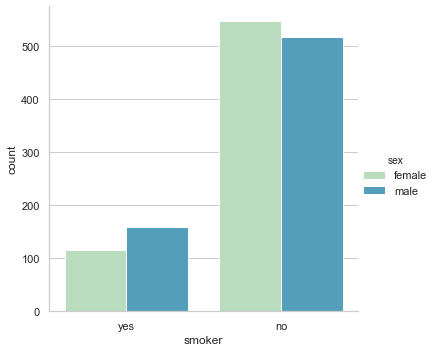

In [19]:
# Smoker count by gender
sns.catplot(x="smoker", kind="count",hue = 'sex',palette='GnBu',data=data)

Text(0.5, 1.0, 'Distribution of charges of non smoker')

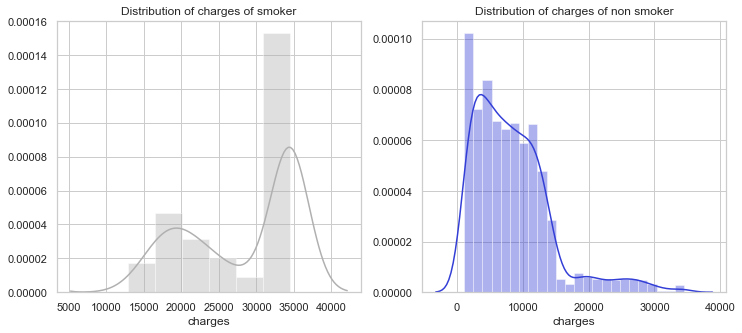

In [20]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='#b0b0b0',ax=ax)
ax.set_title('Distribution of charges of smoker')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='#333ed6',ax=ax)
ax.set_title('Distribution of charges of non smoker')

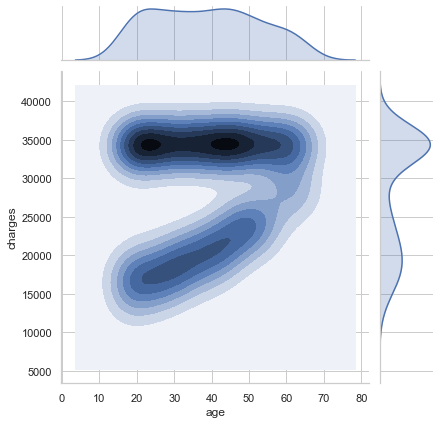

In [21]:
# Age vs charges by smokers
sns.jointplot(x="age", y="charges", data=data[data.smoker=='yes'], kind="kde");

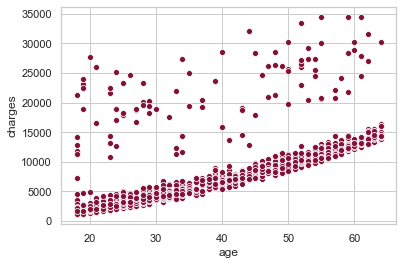

In [22]:
# Age vs Charges Non smokers
sns.scatterplot(x="age", y="charges", data=data[data.smoker=='no'],color='#82113a')

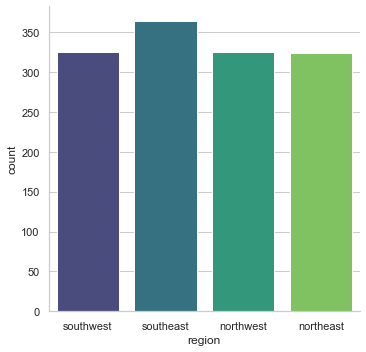

In [23]:
# Region count
sns.catplot(x="region", kind="count",palette='viridis',data=data)

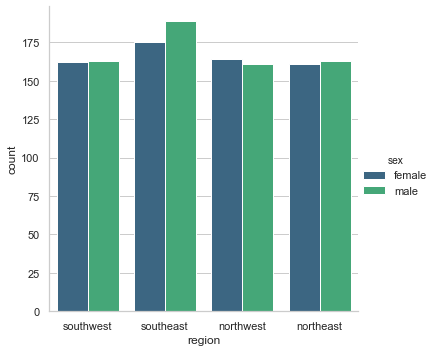

In [24]:
sns.catplot(x="region", kind="count",hue = 'sex',palette='viridis',data=data)

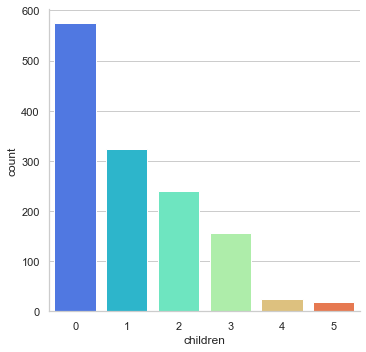

In [25]:
# Children 
sns.catplot(x="children", kind="count",palette='rainbow',data=data)

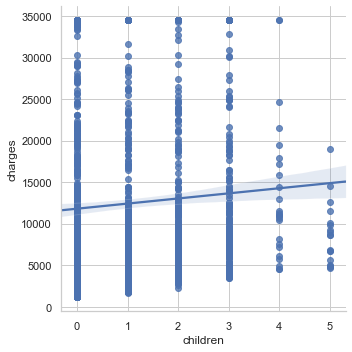

In [26]:
# Children vs Charges
sns.lmplot(x="children", y="charges",data=data)


# Data Preprocessing

In [27]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Rescaling the features

In [29]:
#defining a normalisation function
def normalize (x):
    return ((x-np.min(x)) / (max(x)-min(x)))

#applying normalize ()  to all columns
data_final= data.apply(normalize)

In [30]:
data_final.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.472408
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.018092
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.099725
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.625237
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.082265


# Data Partition

In [31]:
# define our input variable (x) & output variable
x = data.drop("charges", axis = 1)
y = data[['charges']]
# split x and y into x_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)


# with the help of RFE we can also check which the highly importance according to their ranking. ranking with 1 indicates that they are top 6 variables which affect the model.¶

In [32]:
# Running RFE with the output number of the variable equal to 6 
lm = LinearRegression()
rfe = RFE(lm,6)
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)


C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True]
[1 1 1 1 1 1]


In [33]:
col = x_train.columns[rfe.support_]
col

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


# Correlation Matrix

In [34]:
data_1=pd.concat([y_train,x_train],axis=1)

,charges,age,sex,bmi,children,smoker,region
charges,1.000000,0.326462,0.050025,0.156895,0.076856,0.774303,-0.003002
age,0.326462,1.000000,0.006173,0.119934,0.041992,-0.012432,0.018190
sex,0.050025,0.006173,1.000000,0.040873,0.039360,0.061489,-0.007676
bmi,0.156895,0.119934,0.040873,1.000000,0.039369,0.015523,0.175925
children,0.076856,0.041992,0.039360,0.039369,1.000000,0.007465,0.020682
smoker,0.774303,-0.012432,0.061489,0.015523,0.007465,1.000000,0.023183
region,-0.003002,0.018190,-0.007676,0.175925,0.020682,0.023183,1.000000


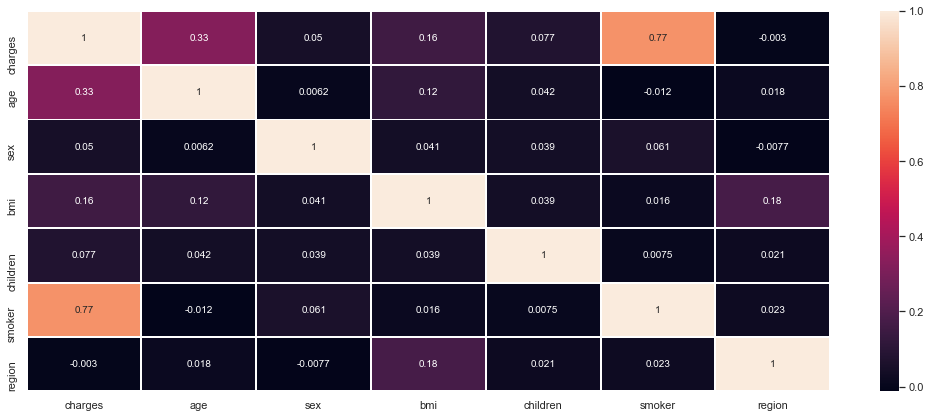

In [35]:
# calculate the correlation matrix
corr = data_1.corr()
# display the correlation matrix
display(corr)
# plot the correlation heatmap
plt.figure(figsize = (18,7))
sns.heatmap(corr,annot = True,linewidths=1) # annot=True will give you value


# Multicolinearity (with the help of VIF)

In [36]:
data_2 = data_1
# the VIF does expect a constant term in the data, 
#so we need to add one using the add_constant method
X1 = sm.add_constant(data_2)
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_before

C:\Users\ganes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const       33.176414
charges      3.686079
age          1.396605
sex          1.007282
bmi          1.096568
children     1.015543
smoker       3.233927
region       1.041349
dtype: float64

# Model Building

In [37]:
x_1 = sm.add_constant(x_train)
# create a OLS model
model = sm.OLS(y_train, x_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     415.9
Date:                Fri, 25 Sep 2020   Prob (F-statistic):          3.91e-259
Time:                        18:47:58   Log-Likelihood:                -9354.7
No. Observations:                 936   AIC:                         1.872e+04
Df Residuals:                     929   BIC:                         1.876e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6034.5953    981.751     -6.147      0.0

# Assumption of Model
- Linearity
- Normality
- Homoscedasicity
- Model Error has to be independently identificaly Distributed

# Homoscedasicity

In [38]:
Data1 = pd.concat([x_train,y_train],axis=1)
Data1['Fitted_value']=model.fittedvalues
Data1['Residual']=model.resid

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


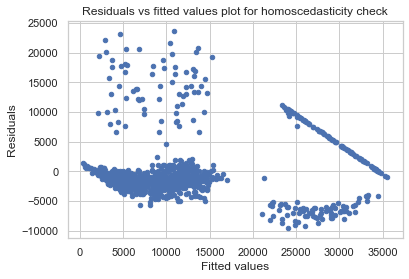

In [39]:
p = Data1.plot.scatter(x='Fitted_value',y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

# Normality

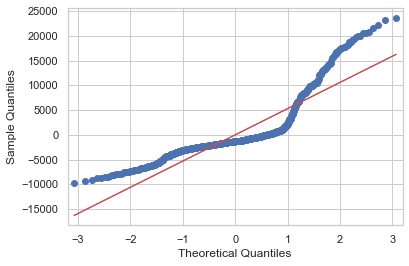

In [40]:
import pylab
# check for the normality of the residuals
sm.qqplot(model.resid, line = 's')
pylab.show()

In [41]:
# also check that the mean of the residualis approx 0
mean_residuals = sum(model.resid)/ len(model.resid)
mean_residuals

5.719322451533606e-12

# Model Error are IID

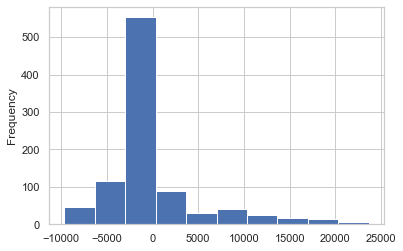

In [42]:
Data1['Residual'].plot.hist()

# Prediction on test data

In [43]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [44]:
x_test2 = x_test[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [45]:
x_test2 = sm.add_constant(x_test2)

In [46]:
x_test2.head()

,const,age,sex,bmi,children,smoker,region
12,1.0,23,1,34.400,0,0,3
306,1.0,28,0,27.500,2,0,3
318,1.0,44,0,27.645,0,0,1
815,1.0,20,0,31.460,0,0,2
157,1.0,18,1,25.175,0,1,0


In [47]:
y_predict = model.predict(x_test2)

In [48]:
test= pd.concat([x_test2,y_test],axis=1)

In [49]:
test['Predicted']=y_predict

In [50]:
test.head()

,const,age,sex,bmi,children,smoker,region,charges,Predicted
12,1.0,23,1,34.400,0,0,3,1826.84300,4193.068231
306,1.0,28,0,27.500,2,0,3,20177.67113,5136.464269
318,1.0,44,0,27.645,0,0,1,7421.19455,8853.397881
815,1.0,20,0,31.460,0,0,2,1877.92940,3538.639169
157,1.0,18,1,25.175,0,1,0,15518.18025,22656.185108


In [51]:
test['orignal_charges'] =  data['charges']

In [52]:
test.head()

,const,age,sex,bmi,children,smoker,region,charges,Predicted,orignal_charges
12,1.0,23,1,34.400,0,0,3,1826.84300,4193.068231,1826.84300
306,1.0,28,0,27.500,2,0,3,20177.67113,5136.464269,20177.67113
318,1.0,44,0,27.645,0,0,1,7421.19455,8853.397881,7421.19455
815,1.0,20,0,31.460,0,0,2,1877.92940,3538.639169,1877.92940
157,1.0,18,1,25.175,0,1,0,15518.18025,22656.185108,15518.18025


In [53]:

def denormalize (x,y):
    return (y*(max(x)-min(x)+np.min(x)))

#applying denormalize ()

In [54]:
x=denormalize(data['charges'],test['Predicted'])

In [55]:
test['Predicted_price']=x

In [56]:
test.head()

,const,age,sex,bmi,children,smoker,region,charges,Predicted,orignal_charges,Predicted_price
12,1.0,23,1,34.400,0,0,3,1826.84300,4193.068231,1826.84300,1.446162e+08
306,1.0,28,0,27.500,2,0,3,20177.67113,5136.464269,20177.67113,1.771533e+08
318,1.0,44,0,27.645,0,0,1,7421.19455,8853.397881,7421.19455,3.053479e+08
815,1.0,20,0,31.460,0,0,2,1877.92940,3538.639169,1877.92940,1.220454e+08
157,1.0,18,1,25.175,0,1,0,15518.18025,22656.185108,15518.18025,7.813971e+08


# Performance on test dataset

In [57]:
import math
#calculate the mse
model_mse = mean_squared_error(test['charges'], test['Predicted'])
# calculate the mae
model_mae =  mean_absolute_error(test['charges'],test['Predicted'])
# calculate rmse
model_rmse  = math.sqrt(model_mse)
# display the output
print('MSE{: .3}'.format(model_mse))
print('MAE{: .3}'.format(model_mae))
print('RMSE{: .3}'.format(model_rmse))

MSE 2.14e+07
MAE 3.18e+03
RMSE 4.63e+03


# Performance on training data set

In [58]:

import math
#calculate the mse
model_mse = mean_squared_error(Data1['charges'], Data1['Fitted_value'])
# calculate the mae
model_mae =  mean_absolute_error(Data1['charges'], Data1['Fitted_value'])
# calculate rmse
model_rmse  = math.sqrt(model_mse)
# display the output
print('MSE{: .3}'.format(model_mse))
print('MAE{: .3}'.format(model_mae))
print('RMSE{: .3}'.format(model_rmse))

MSE 2.81e+07
MAE 3.44e+03
RMSE 5.3e+03


# Thank U ~ Ganesh Kasturi